# Read this carefully
The main goal of this exercise is to verify how understandable are explanations provided to the users in a form of rules.

In this notebook we will explain a decision of a blackbox machine learning model (Neural Network). 
Such a model makes a proediction based on complext transformaiton of input into output. 

We are interested in two types of explanation:
  * Regular explanation: Why instance X was classified as 0 or 1?
  * Counterfactual explanations: What to do to instance X (how to modify it) to make it be classified as opposite class?

To answer that question we train an interpretable in a local neighbourhood of X and use it to answer this questions.
In our case, the interpretable model is a decision tree.

In such a case we can answer the aforementioned quesitons using a tree in  following way:
  * Take the instance X and classify it with a tree. The brranch that the instance was falling from the root to the leaf is the rule that explains why it was classified as 0 or 1
  e.g. `{'f_1': ['< -0.5'], 'f_2': ['> 1.0']}` means that the X was classfied as 0 or one because value of `f_1` was less than `-0.5` and value of `f_2` was greater than `1`.
  * Take an instance X and search for other branches in a tree which contain opposit classes. The branch that contain points which are closest to X is a branch that define a rule for counterfactual. For instance:  `{'f_1': ['< -0.5'], 'f_2': ['<= 1.0']}` means that any instance that satisties this rule is a counterfactual example for X.

**Caution** Some of the explanations may not be valid - e.g. counterfactual can have the same explnanation as factual, which is incorrect! Pay attention to that! If it is not possible to give answer to a queation, leave it as **None**

For instance if the explanation is: `{'f_1': ['< -0.5']}` and counterfactual is the same `{'f_1': ['< -0.5']}` than there is an error in explanation! If you are able to provide answers to the questions below despite that -- do it. If not, leave the answer as **None**. **In some cases it is possible to answer the questions despite the incorrect explanation!**


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!git clone -b main --single-branch https://github.com/sbobek/lux.git
!pip install shap gower imbalanced-learn

Cloning into 'lux'...
remote: Enumerating objects: 446, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 446 (delta 100), reused 91 (delta 66), pack-reused 298
Receiving objects: 100% (446/446), 95.47 MiB | 26.12 MiB/s, done.
Resolving deltas: 100% (212/212), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 23.7 MB/s eta 0:00:00


In [ ]:
%cd lux
!git submodule update --init --recursive

/content/lux
Submodule 'pyuid3' (https://github.com/sbobek/pyuid3) registered for path 'pyuid3'
Cloning into '/content/lux/pyuid3'...
Submodule path 'pyuid3': checked out 'f57a86e66f647edef2828ef1954c9be559e12ea7'


In [ ]:
!git clone https://github.com/sbobek/lux-human-survey.git
!mv lux-human-survey/results ../results

Cloning into 'lux-human-survey'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 39 (delta 10), reused 39 (delta 10), pack-reused 0
Unpacking objects: 100% (39/39), 880.44 KiB | 3.95 MiB/s, done.


In [ ]:
%ls

data/               lux_comparison.ipynb               neighbourhood.png
decbound-point.png  lux-human-survey/                  pix/
explanations.png    lux_intuition_example.ipynb        pyuid3/
hmrp.png            lux_neighborhood_generation.ipynb  README.md
LICENSE             lux_usage_example.ipynb            requirements.txt
lux/                lux_usage_example_shap.ipynb       utree.png


In [ ]:
import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.neighbors import NearestNeighbors
from lux.lux import LUX
from numpy import random
import pickle
import os 
import graphviz
from graphviz import Source
from IPython.display import SVG, Image

In [ ]:
train = pd.read_csv('../results/train.csv')
test = pd.read_csv('../results/test.csv')
it2csv = pd.read_csv('../results/explain_samples.csv')
clf = pickle.load(open('../results/clf.pickle','rb'))
target = ['class']
features = [f for f in train.columns if f not in target]
    

In [ ]:
i2e = it2csv[features].values
path = '../results'
if not os.path.exists(path+'/exp_models/'):
    print('ERROR')

for idx2e in range(0, len(i2e)):
    if not os.path.exists(path+f'/exp_models/mod_i2e_{idx2e}/'):
        print('ERROR')
    



In [ ]:
import time
start = time.time()

# Question 1
You need to obtain explanation of a decision of a balckbox model for an instance below.

In [ ]:
#Możliwe,że źle zrozumiałem pojęcie counterfactual-ale starałem się tutaj w tym pytaniu, by wszelkie
#counterfactual wynosiło zero.
#Możliwe,że w counterfactual chodzi o to,by była po prostu odwrotna niz w podanym i2e[idx2e]
#tak czy siak, to nie zmienia wiele w działaniu na tym-ale może powodować zmiany w odpowiedziach

idx2e=0
pd.DataFrame(i2e[idx2e].reshape(1,-1), columns=features)


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7
0,-0.566705,-1.793921,0.333625,-0.610432,-0.525247,-0.599821,-0.657135,-0.334803


In [ ]:
print(f"True label of the explained instance (returned by the blackbox model): {clf.predict(i2e[idx2e].reshape(1,-1))[0]}")

True label of the explained instance (returned by the blackbox model): 1


## Textual explanation and counterfactual

In [ ]:
idx2e=0
explanation = lux.justify(i2e[idx2e].reshape(1, -1), to_dict=True)[0][0]['rule']
print("Explanation:")
print(explanation)


cf_medoid = lux.counterfactual(i2e[idx2e].reshape(1, -1), train[features], counterfactual_representative='medoid', topn=1)[0]
counterfactual_rule = cf_medoid['rule']
print("\n medoid Counterfactual:")
print(counterfactual_rule)

if counterfactual_rule==explanation:
  print("something bad happened")

cf_medoid = lux.counterfactual(i2e[idx2e].reshape(1, -1), train[features], counterfactual_representative='nearest', topn=1)[0]
counterfactual_rule = cf_medoid['rule']
print("\n nearest  Counterfactual:")
print(counterfactual_rule)

if counterfactual_rule==explanation:
  print("something bad happened")
#czasem to działa,a czasem nie..

Explanation:
{'f_4': ['< -0.19929116281545256']}

 medoid Counterfactual:
{'f_4': ['< -0.19929116281545256']}
something bad happened

 nearest  Counterfactual:
{'f_4': ['< -0.19929116281545256']}
something bad happened


[-0.56670511 -1.79392111  0.33362461 -0.61043247 -0.52524674 -0.59982139
 -0.65713496 -0.33480299]
Original counterfactual example:
f_0    0.408653
f_1   -1.776235
f_2    0.457769
f_3   -0.778978
f_4   -0.748500
f_5   -1.029372
f_6   -1.352670
f_7    0.143388
Name: 281, dtype: float64


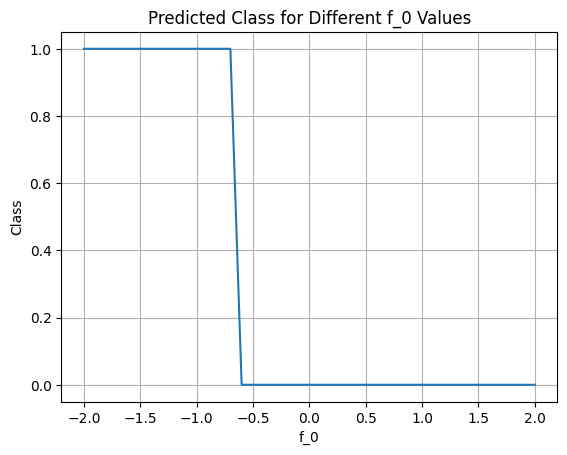

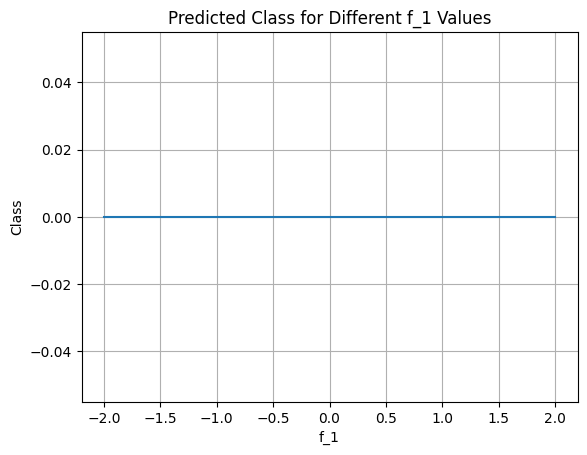

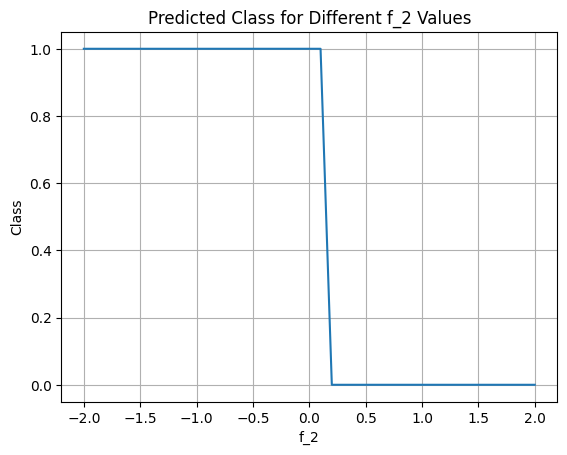

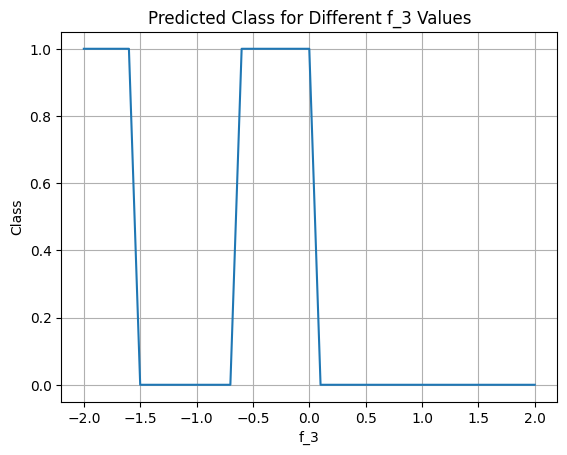

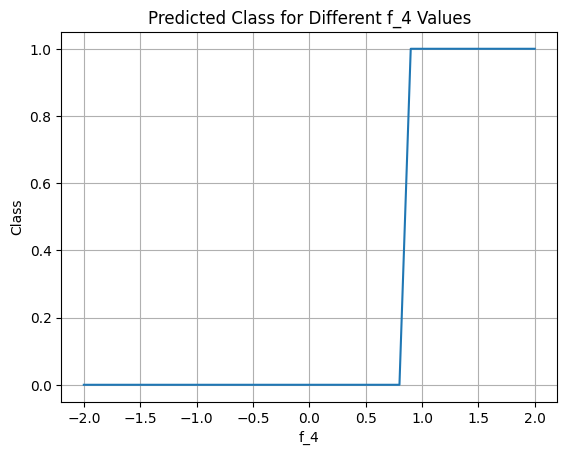

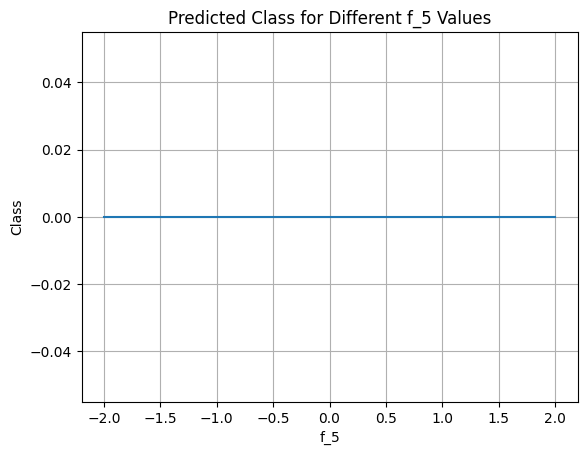

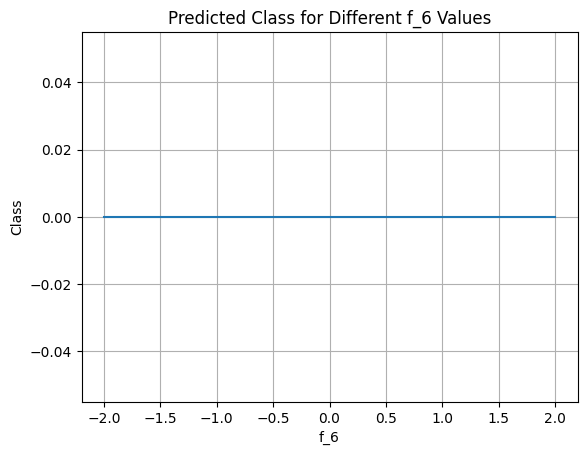

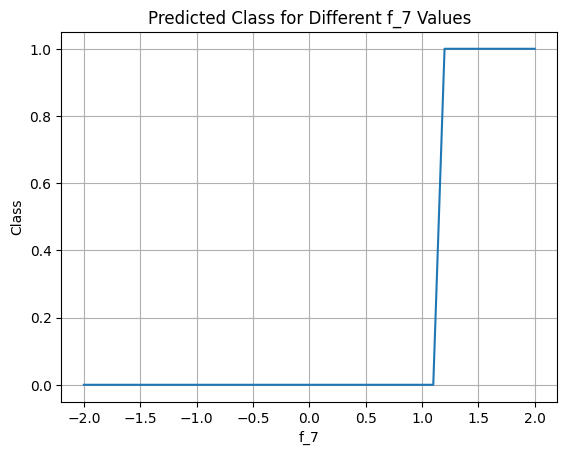

In [ ]:
#lets try to explore the predictions and look for cf
print (i2e[idx2e])



features = ['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', ]

counterfactual_example = cf_medoid['counterfactual']
print("Original counterfactual example:")
print(counterfactual_example)

values = np.arange(-2, 2.1, 0.1)

predictions = np.zeros((len(features), len(values)))
for i, feature in enumerate(features):
    modified_counterfactual = counterfactual_example.copy()

  
    for j, value in enumerate(values):
        modified_counterfactual[feature] = value
        prediction = clf.predict(modified_counterfactual.values.reshape(1, -1))[0]
        predictions[i, j] = prediction


for i, feature in enumerate(features):
    plt.figure()
    plt.plot(values, predictions[i])
    plt.xlabel(feature)
    plt.ylabel('Class')
    plt.title(f'Predicted Class for Different {feature} Values')
    plt.grid(True)
    plt.show()



# Based on the explanation above, try to predict what will be the model output for the following instance:

In [ ]:
similari2e=pickle.load( open(path+f'/exp_models/mod_i2e_{0}/similari2e.pickle','rb'))
similari2e.to_frame().T
clf.predict(i2e[idx2e].reshape(1,-1))[0]

#do porównania z rules- które są sprzeczne

1

In [ ]:
PREDICTION_1 =1 # Change to 0 (The balckbox model will predict 0) or 1 (The blackbox model will predict 1)

## Your confidence in the answer
CONFIDENCE_PREDICTION_1= 1 # Change to 0 (I have no idea if my answer is correct) to 5 (I am confident that my ansewer is correct wrt to evidence I saw)

# Can you chage the counterfactual example to be more certain that it will be labelled as it suppose to be?

In [ ]:
import numpy as np


counterfactual_example = cf_medoid['counterfactual']
print("Original counterfactual example:")
print(counterfactual_example)


new_counterfactual_example = counterfactual_example.copy()


new_counterfactual_example['f_0'] = 2.0  
new_counterfactual_example['f_1'] = 2.0  
new_counterfactual_example['f_2'] = 2.0  
new_counterfactual_example['f_7'] = -2.0  
predicted = clf.predict(new_counterfactual_example.values.reshape(1, -1))[0]

print("modified cf:")
print(new_counterfactual_example)
print(new_counterfactual_example.values.reshape(1, -1))
print("Prediction for modified cf", predicted)


Original counterfactual example:
f_0    0.408653
f_1   -1.776235
f_2    0.457769
f_3   -0.778978
f_4   -0.748500
f_5   -1.029372
f_6   -1.352670
f_7    0.143388
Name: 281, dtype: float64
modified cf:
f_0    2.000000
f_1    2.000000
f_2    2.000000
f_3   -0.778978
f_4   -0.748500
f_5   -1.029372
f_6   -1.352670
f_7   -2.000000
Name: 281, dtype: float64
[[ 2.          2.          2.         -0.77897812 -0.74849981 -1.02937151
  -1.35267029 -2.        ]]
Prediction for modified cf 0


In [ ]:
#True class of counterfactual is:
print(f"True label of counterfactual: {clf.predict(cf_medoid['counterfactual'].values.reshape(1,-1))[0]}")

True label of counterfactual: 0


In [ ]:
COUNTERFACTUAL_CHANGE_1 = [ 2.0,,2.0,2.0,-0.77897812,-0.74849981,-1.02937151,-1.35267029,-2. ]0]

COUNTERFACTUAL_CHANGE_CLASS_1 =0 # Change to 0 (The balckbox model will predict 0) or 1 (The blackbox model will predict 1)


## Your confidence in the answer
CONFIDENCE_CHANGE_COUNTERFACTUAL_1 =3 # Change to  0-5 #As far as i can tell with only very basic data exploration

# Based on the counterfactual explanation above, try to provide additional counterfactual example for the instance

In [ ]:
#provide counterfactual for the instance below
pd.DataFrame(i2e[idx2e].reshape(1,-1), columns=features)






,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7
0,-0.566705,-1.793921,0.333625,-0.610432,-0.525247,-0.599821,-0.657135,-0.334803


In [ ]:
import pandas as pd
import numpy as np


instance = pd.DataFrame(i2e[idx2e].reshape(1, -1), columns=features)
target_label = 0

counterfactual = instance.copy()

for feature in counterfactual.columns:
    _certain = 0.0
    best_value = counterfactual[feature].values[0]
    for value in np.arange(-2.0, 2.1, 0.1):
        counterfactual[feature] = value
        certain = clf.predict_proba(counterfactual)[0][target_label]
        if certain > _certain:
            _certain = certain
            best_value = value
    counterfactual[feature] = best_value

print("Counterfactual example:")

print(counterfactual)

clf.predict(counterfactual.values.reshape(1, -1))[0]


Counterfactual example:
   f_0           f_1  f_2  f_3  f_4  f_5  f_6  f_7
0  2.0  1.776357e-15  2.0  2.0 -2.0  2.0 -2.0 -0.4


0

In [ ]:
COUNTERFACTUAL_NEW_1 = None  [2.0, 1.776357e-15,2.0,2.0,-2.0,2.0,-2.0,-0.4] e.g. [-0.566705	,-1.793921,	0.333625,	-0.610432	,-0.525247,	-0.599821,	-0.657135	,-0.334803]
COUNTERFACTUAL_NEW_CLASS_1 = 0

## Your confidence in the answer
CONFIDENCE_NEW_COUNTERFACTUAL_1 = 3

# Question 2
You need to obtain explanation of a decision of a balckbox model for an instance below.



In [ ]:
idx2e=1
pd.DataFrame(i2e[idx2e].reshape(1,-1), columns=features)

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7
0,1.288863,0.218389,-0.880719,1.452261,1.462101,-0.133003,-1.320892,-0.193428


In [ ]:
print(f"True label of the explained instance (returned by the blackbox model): {clf.predict(i2e[idx2e].reshape(1,-1))[0]}")

True label of the explained instance (returned by the blackbox model): 1


## Textual explanation and counterfactual

In [ ]:
#explanation
lux=pickle.load( open(path+f'/exp_models/mod_i2e_{idx2e}/lux.pickle','rb'))
lux.justify(i2e[idx2e].reshape(1,-1),to_dict=True)[0][0]['rule']


{'f_3': ['>= -0.2458133417403509'], 'f_4': ['>= -0.19929116281545256']}

In [ ]:
#counterfactual
cf_medoid = lux.counterfactual(i2e[idx2e].reshape(1,-1), train[features], counterfactual_representative='nearest', topn=1)[0]
cf_medoid['rule']



{'f_3': ['< -0.2458133417403509', '>= -0.8897095133652263'],
 'f_4': ['>= -0.19929116281545256']}

In [ ]:
cf_medoid = lux.counterfactual(i2e[idx2e].reshape(1,-1), train[features], counterfactual_representative='medoid', topn=1)[0]
cf_medoid['rule']

{'f_3': ['< -0.2458133417403509', '>= -0.8897095133652263'],
 'f_4': ['>= -0.19929116281545256']}

# Based on the explanation above, try to predict what will be the model output for the following instance:

In [ ]:
similari2e=pickle.load( open(path+f'/exp_models/mod_i2e_{idx2e}/similari2e.pickle','rb'))
similari2e.to_frame().T

#zgodnie z rule, f_3 i f_4 < od wartości 

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7
43,-0.502975,0.689708,0.702195,-1.088826,-1.198495,0.263487,0.294224,-1.292263


In [ ]:
PREDICTION_2 = 0

## Your confidence in the answer
CONFIDENCE_PREDICTION_2= 5 

# Can you chage the counterfactual example to be more certain that it will be labelled as it suppose to be?

In [ ]:
#Counterfactual should be 0
cf=cf_medoid['counterfactual']
print(cf)
cf['f_3']=-2
cf['f_4']=-2

prediction = clf.predict(cf.values.reshape(1, -1))[0] 
print("Predicted label for the modified counterfactual:", prediction)

f_0    0.721479
f_1   -0.735303
f_2    0.051577
f_3   -2.000000
f_4    0.813423
f_5   -1.050141
f_6    0.757495
f_7   -0.524448
Name: 26, dtype: float64
Predicted label for the modified counterfactual: 0


In [ ]:
#True class of counterfactual is:
print(f"True label of counterfactual: {clf.predict(cf_medoid['counterfactual'].values.reshape(1,-1))[0]}")

True label of counterfactual: 1


In [ ]:
COUNTERFACTUAL_CHANGE_2 = [0.721479, -0.735303, 0.051577, -2.0, -2.0, -1.050141, 0.757495, -0.524448]
COUNTERFACTUAL_CHANGE_CLASS_2 = 0 



CONFIDENCE_CHANGE_COUNTERFACTUAL_2 = 2 # It just works.The rules.. dont seem to.

# Based on the counterfactual explanation above, try to provide additional counterfactual example for the instance

In [ ]:
#provide counterfactual for the instance below
ex1=pd.DataFrame(i2e[idx2e].reshape(1,-1), columns=features)
clf.predict(ex1)[0] 

1

In [ ]:
COUNTERFACTUAL_NEW_2 = None # Change to [f_0, f_1 ,f_2, f_3,f_4, f_5, f_6, f_7] e.g. [-0.566705	,-1.793921,	0.333625,	-0.610432	,-0.525247,	-0.599821,	-0.657135	,-0.334803]
COUNTERFACTUAL_NEW_CLASS_2 = None # Change to 0 OR 1

## Your confidence in the answer
CONFIDENCE_NEW_COUNTERFACTUAL_2 = None # Change to 0-5

# Question 3
You need to obtain explanation of a decision of a balckbox model for an instance below.



In [ ]:
idx2e=2
pd.DataFrame(i2e[idx2e].reshape(1,-1), columns=features)


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7
0,-0.041472,-0.397115,0.510938,-0.977625,-0.784114,-1.099039,1.796665,-1.312163


In [ ]:
print(f"True label of the explained instance (returned by the blackbox model): {clf.predict(i2e[idx2e].reshape(1,-1))[0]}")

True label of the explained instance (returned by the blackbox model): 0


## Textual explanation and counterfactual

In [ ]:
#explanation
lux=pickle.load( open(path+f'/exp_models/mod_i2e_{idx2e}/lux.pickle','rb'))
lux.justify(i2e[idx2e].reshape(1,-1),to_dict=True)[0][0]['rule']

{'f_4': ['< -0.19929116281545256']}

In [ ]:
#counterfactual
cf_medoid = lux.counterfactual(i2e[idx2e].reshape(1,-1), train[features], counterfactual_representative='nearest', topn=1)[0]
cf_medoid['rule']

{'f_3': ['< -0.2458133417403509'], 'f_4': ['>= -0.19929116281545256']}

# Based on the explanation above, try to predict what will be the model output for the following instance:

In [ ]:
similari2e=pickle.load( open(path+f'/exp_models/mod_i2e_{idx2e}/similari2e.pickle','rb'))
similari2e.to_frame().T
#e=similari2e.to_frame().T
#print(f"True label of the explained instance (returned by the blackbox model): {clf.predict(e)[0]}")

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7
236,-0.139397,-0.358029,0.345671,-0.960128,-0.388754,0.739653,-1.909356,0.491208


In [ ]:
PREDICTION_3 =0

## Your confidence in the answer
CONFIDENCE_PREDICTION_3= 4 # Change to 0 to 5

# Can you chage the counterfactual example to be more certain that it will be labelled as it suppose to be?

In [ ]:
#Counterfactual
cf_medoid['counterfactual']

f_0    0.721479
f_1   -0.735303
f_2    0.051577
f_3   -0.763062
f_4    0.236068
f_5   -1.050141
f_6    0.757495
f_7   -0.524448
Name: 26, dtype: float64

In [ ]:
#True class of counterfactual is:
print(f"True label of counterfactual: {clf.predict(cf_medoid['counterfactual'].values.reshape(1,-1))[0]}")

True label of counterfactual: 0


In [ ]:



COUNTERFACTUAL_CHANGE_3 = [0.721479, -0.735303, 0.051577, -1.0, 1.0, -1.050141, 0.757495, -0.524448]
COUNTERFACTUAL_CHANGE_CLASS_3 = 1 # Change to 0 (The balckbox model will predict 0) or 1 (The blackbox model will predict 1)


## Your confidence in the answer
CONFIDENCE_CHANGE_COUNTERFACTUAL_3 = 5 # there's no such thing as overconfidence here. I'm scared of running clf.predict()

# Based on the counterfactual explanation above, try to provide additional counterfactual example for the instance

In [ ]:
#provide counterfactual for the instance below
ex3=pd.DataFrame(i2e[idx2e].reshape(1,-1), columns=features)
#probably 0.. based on f_4



array([0])

In [ ]:
COUNTERFACTUAL_NEW_3 =None # Change to [f_0, f_1 ,f_2, f_3,f_4, f_5, f_6, f_7] e.g. [-0.566705	,-1.793921,	0.333625,	-0.610432	,-0.525247,	-0.599821,	-0.657135	,-0.334803]
COUNTERFACTUAL_NEW_CLASS_3 = None # Change to 0 (The balckbox model will predict 0) or 1 (The blackbox model will predict 1)

## Your confidence in the answer
CONFIDENCE_NEW_COUNTERFACTUAL_3 = None # Change to 0-5

# Question 4
You need to obtain explanation of a decision of a balckbox model for an instance below.



In [ ]:
idx2e=3
pd.DataFrame(i2e[idx2e].reshape(1,-1), columns=features)

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7
0,-1.77397,-0.7712,0.057979,1.788569,-0.99022,-0.68605,-0.617212,-0.020099


In [ ]:
print(f"True label of the explained instance (returned by the blackbox model): {clf.predict(i2e[idx2e].reshape(1,-1))[0]}")

True label of the explained instance (returned by the blackbox model): 0


## Textual explanation and counterfactual

In [ ]:
#Explanation
lux=pickle.load( open(path+f'/exp_models/mod_i2e_{idx2e}/lux.pickle','rb'))
lux.justify(i2e[idx2e].reshape(1,-1),to_dict=True)[0][0]['rule']

{'f_4': ['< -0.19929116281545256']}

In [ ]:
#counterfactual
cf_medoid = lux.counterfactual(i2e[idx2e].reshape(1,-1), train[features], counterfactual_representative='nearest', topn=1)[0]
cf_medoid['rule']

{'f_3': ['>= -0.2458133417403509'], 'f_4': ['>= -0.19929116281545256']}

# Based on the explanation above, try to predict what will be the model output for the following instance:

In [ ]:
similari2e=pickle.load( open(path+f'/exp_models/mod_i2e_{idx2e}/similari2e.pickle','rb'))
similari2e.to_frame().T
c=similari2e.to_frame().T
print(f"True label of counterfactual: {clf.predict(c.values.reshape(1,-1))[0]}")

True label of counterfactual: 1


In [ ]:
PREDICTION_4 = 1 # Change to  0 or 1?


CONFIDENCE_PREDICTION_4= 5

# Can you chage the counterfactual example to be more certain that it will be labelled as it suppose to be?

In [ ]:
#Counterfactual
cf_medoid['counterfactual']
cf_medoid['counterfactual']['f_3'] = 0.5  # Change the value of f_3 to satisfy the rule '< -0.2458133417403509'
cf_medoid['counterfactual']['f_4'] = 0.5   # Change the value of f_4 to satisfy the rule '>= -0.19929116281545256'
cf_medoid['counterfactual']

f_0   -1.506525
f_1   -0.619123
f_2   -0.449360
f_3    0.500000
f_4    0.500000
f_5   -1.004291
f_6   -1.181982
f_7   -1.098409
Name: 742, dtype: float64

In [ ]:
#True class of counterfactual is:
print(f"True label of counterfactual: {clf.predict(cf_medoid['counterfactual'].values.reshape(1,-1))[0]}")

True label of counterfactual: 1


In [ ]:
COUNTERFACTUAL_CHANGE_4 = [0.849102, 0.695538, 0.002276, -0.500000, 0.500000, -0.293967, -0.071599, -0.387100]
COUNTERFACTUAL_CHANGE_CLASS_4 = 1 


CONFIDENCE_CHANGE_COUNTERFACTUAL_4 = 5 # it's 1AM, at this point it's all or nothing. Maybe except writing these comments.

# Based on the counterfactual explanation above, try to provide additional counterfactual example for the instance

In [ ]:
#provide counterfactual for the instance below
cf_example=pd.DataFrame(i2e[idx2e].reshape(1,-1), columns=features)
pd.DataFrame(i2e[idx2e].reshape(1,-1), columns=features)
#print(f"True label of counterfactual: {clf.predict(example.values.reshape(1,-1))[0]}")
#wygląda na zero
cf_example['f_3']= -2.0
print(cf_example)
print(f"True label of counterfactual: {clf.predict(cf_example.values.reshape(1,-1))[0]}")

       f_0     f_1       f_2  f_3      f_4      f_5       f_6       f_7
0 -1.77397 -0.7712  0.057979 -2.0 -0.99022 -0.68605 -0.617212 -0.020099
True label of counterfactual: 1


In [ ]:
COUNTERFACTUAL_NEW_4 = [-1.77397 -0.7712  0.057979 -2.0 -0.99022 -0.68605 -0.617212 -0.020099]
COUNTERFACTUAL_NEW_CLASS_4 = 1 


CONFIDENCE_NEW_COUNTERFACTUAL_4 = 4 

# Question 5
You need to obtain explanation of a decision of a balckbox model for an instance below.


In [ ]:
idx2e=4
pd.DataFrame(i2e[idx2e].reshape(1,-1), columns=features)

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7
0,-0.916274,0.721135,0.20186,-0.984431,-0.025966,1.355443,1.170199,0.881408


In [ ]:
print(f"True label of the explained instance (returned by the blackbox model): {clf.predict(i2e[idx2e].reshape(1,-1))[0]}")

True label of the explained instance (returned by the blackbox model): 1


## Textual explanation and counterfactual

In [ ]:
#Explanation
lux=pickle.load( open(path+f'/exp_models/mod_i2e_{idx2e}/lux.pickle','rb'))
lux.justify(i2e[idx2e].reshape(1,-1),to_dict=True)[0][0]['rule']

{'f_3': ['< -0.2458133417403509'], 'f_4': ['>= -0.19929116281545256']}

In [ ]:
#counterfactual
cf_medoid = lux.counterfactual(i2e[idx2e].reshape(1,-1), train[features], counterfactual_representative='medoid', topn=1)[0]
cf_medoid['rule']

{'f_4': ['< -0.19929116281545256']}

# Based on the explanation above, try to predict what will be the model output for the following instance:

In [ ]:
similari2e=pickle.load( open(path+f'/exp_models/mod_i2e_{idx2e}/similari2e.pickle','rb'))
x=similari2e.to_frame().T
#nie spełnia wszystkich zależności counterfactual.
print(f"True label of the explained instance (returned by the blackbox model): {clf.predict(x)[0]}")

True label of the explained instance (returned by the blackbox model): 1


In [ ]:
PREDICTION_5 = 1 # Change to 0 (The balckbox model will predict 0) or 1 (The blackbox model will predict 1)


CONFIDENCE_PREDICTION_5= 4 # Change to 0 to 5

# Can you chage the counterfactual example to be more certain that it will be labelled as it suppose to be?

In [ ]:
#Counterfactual example
cf=cf_medoid['counterfactual']
print(cf)
cf['f_4']=-1.0
cf['f_3']=1.0

f_0    0.091752
f_1   -0.064188
f_2    0.722468
f_3    1.000000
f_4   -1.000000
f_5    0.252240
f_6   -0.116229
f_7   -0.194697
Name: 401, dtype: float64


In [ ]:
#True class of counterfactual is:
print(f"True label of counterfactual: {clf.predict(cf.values.reshape(1,-1))[0]}")

True label of counterfactual: 0


In [ ]:
COUNTERFACTUAL_CHANGE_5 = [0.031759, -0.165081, -0.757164, 1.0,-1.0, 0.075674, -0.432295, -0.143660]
COUNTERFACTUAL_CHANGE_CLASS_5 = 0 # Change to 0 (The balckbox model will predict 0) or 1 (The blackbox model will predict 1)


## Your confidence in the answer
CONFIDENCE_CHANGE_COUNTERFACTUAL_5 =4 

# Based on the counterfactual explanation above, try to provide additional counterfactual example for the instance

In [ ]:
#provide counterfactual for the instance below
pd.DataFrame(i2e[idx2e].reshape(1,-1), columns=features)
cf2=pd.DataFrame(i2e[idx2e].reshape(1,-1), columns=features)
cf2['f_4']=-1.0
cf2['f_3']=1.0
print(cf2)
print(f"True label of counterfactual: {clf.predict(cf2.values.reshape(1,-1))[0]}")

        f_0       f_1      f_2  f_3  f_4       f_5       f_6       f_7
0 -0.916274  0.721135  0.20186  1.0 -1.0  1.355443  1.170199  0.881408
True label of counterfactual: 0


In [ ]:
COUNTERFACTUAL_NEW_5 = [-0.916274, 0.721135, 0.20186, 1.0, -1.0, 1.355443, 1.170199, 0.881408]
COUNTERFACTUAL_NEW_CLASS_5 = 0

## Your confidence in the answer
CONFIDENCE_NEW_COUNTERFACTUAL_5 = 5


# The End

In [ ]:
end = time.time()
elapsed = end-start
print(f'Elapsed time: {elapsed}')

Elapsed time: 7003.305446624756


In [ ]:
res1 = [PREDICTION_1 , CONFIDENCE_PREDICTION_1, COUNTERFACTUAL_CHANGE_1 , COUNTERFACTUAL_CHANGE_CLASS_1  , CONFIDENCE_CHANGE_COUNTERFACTUAL_1 , COUNTERFACTUAL_NEW_1 , COUNTERFACTUAL_NEW_CLASS_1  , CONFIDENCE_NEW_COUNTERFACTUAL_1]
res2 = [PREDICTION_2 , CONFIDENCE_PREDICTION_2, COUNTERFACTUAL_CHANGE_2 , COUNTERFACTUAL_CHANGE_CLASS_2  , CONFIDENCE_CHANGE_COUNTERFACTUAL_2 , COUNTERFACTUAL_NEW_2 , COUNTERFACTUAL_NEW_CLASS_2  , CONFIDENCE_NEW_COUNTERFACTUAL_2]
res3 = [PREDICTION_3 , CONFIDENCE_PREDICTION_3, COUNTERFACTUAL_CHANGE_3 , COUNTERFACTUAL_CHANGE_CLASS_3  , CONFIDENCE_CHANGE_COUNTERFACTUAL_3 , COUNTERFACTUAL_NEW_3 , COUNTERFACTUAL_NEW_CLASS_3  , CONFIDENCE_NEW_COUNTERFACTUAL_3]
res4 = [PREDICTION_4 , CONFIDENCE_PREDICTION_4, COUNTERFACTUAL_CHANGE_4 , COUNTERFACTUAL_CHANGE_CLASS_4  , CONFIDENCE_CHANGE_COUNTERFACTUAL_4 , COUNTERFACTUAL_NEW_4 , COUNTERFACTUAL_NEW_CLASS_4  , CONFIDENCE_NEW_COUNTERFACTUAL_4]
res5 = [PREDICTION_5 , CONFIDENCE_PREDICTION_5, COUNTERFACTUAL_CHANGE_5 , COUNTERFACTUAL_CHANGE_CLASS_5  , CONFIDENCE_CHANGE_COUNTERFACTUAL_5 , COUNTERFACTUAL_NEW_5 , COUNTERFACTUAL_NEW_CLASS_5  , CONFIDENCE_NEW_COUNTERFACTUAL_5]

## Make sure you have answered all the questiones

In [ ]:
final = pd.DataFrame([res1,res2,res3,res4,res5])
#Missing answers in questions:
final.isna().sum()

0    5
1    5
2    4
3    4
4    4
5    4
6    4
7    4
dtype: int64

## Download the file and upload to: https://forms.office.com/e/C6jEu5j46p

In [ ]:
from google.colab import files
final.to_csv('final.xls') 
files.download('final.xls')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>